#### Project 5: Predicted Pollution Mortality
#### Corey J Sinnott
# Visualizations

## Executive Summary

This report was commissioned to explore mortality influenced by pollution. Data was obtained from several sources listed below. The problem statement was defined as, can we predict pollution mortality? After in-depth analysis, conclusions and recommendations will be presented.


## Contents:
- [Visualizations](#Visualizations)


#### Importing Libraries

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'/Users/coreysinnott/Desktop/DSI_class/Submissions/project/project-5'

In [28]:
df = pd.read_csv('./data/model_df_countries.csv')

In [32]:
df = df.drop(columns = 'Unnamed: 0')

In [33]:
df.head(3)

country  year  annual_co2_emmissions  health_spend_per_capita  \
0     Abkhazia  1990               2.603238                      NaN   
1  Afghanistan  1991               2.427366                      NaN   
2  Afghanistan  1992               1.379462                      NaN   

   life_expectancy  ozone_depleting_emissions  min_daily_ozone  \
0           49.856                      75.09            111.0   
1           50.627                      68.67             94.0   
2           51.331                      66.03            105.0   

   mean_daily_ozone  population  pollution_deaths  
0             124.2  12412000.0           4383.83  
1             119.0  13299000.0           4426.36  
2             114.3  14486000.0           4568.91

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    4015 non-null   object 
 1   year                       4015 non-null   int64  
 2   annual_co2_emmissions      4010 non-null   float64
 3   health_spend_per_capita    2793 non-null   float64
 4   life_expectancy            3806 non-null   float64
 5   ozone_depleting_emissions  3868 non-null   float64
 6   min_daily_ozone            3874 non-null   float64
 7   mean_daily_ozone           3874 non-null   float64
 8   population                 4015 non-null   float64
 9   pollution_deaths           4015 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 313.8+ KB


In [59]:
df_high_pop = df[df.population > 50_000_000]

# Visualizations

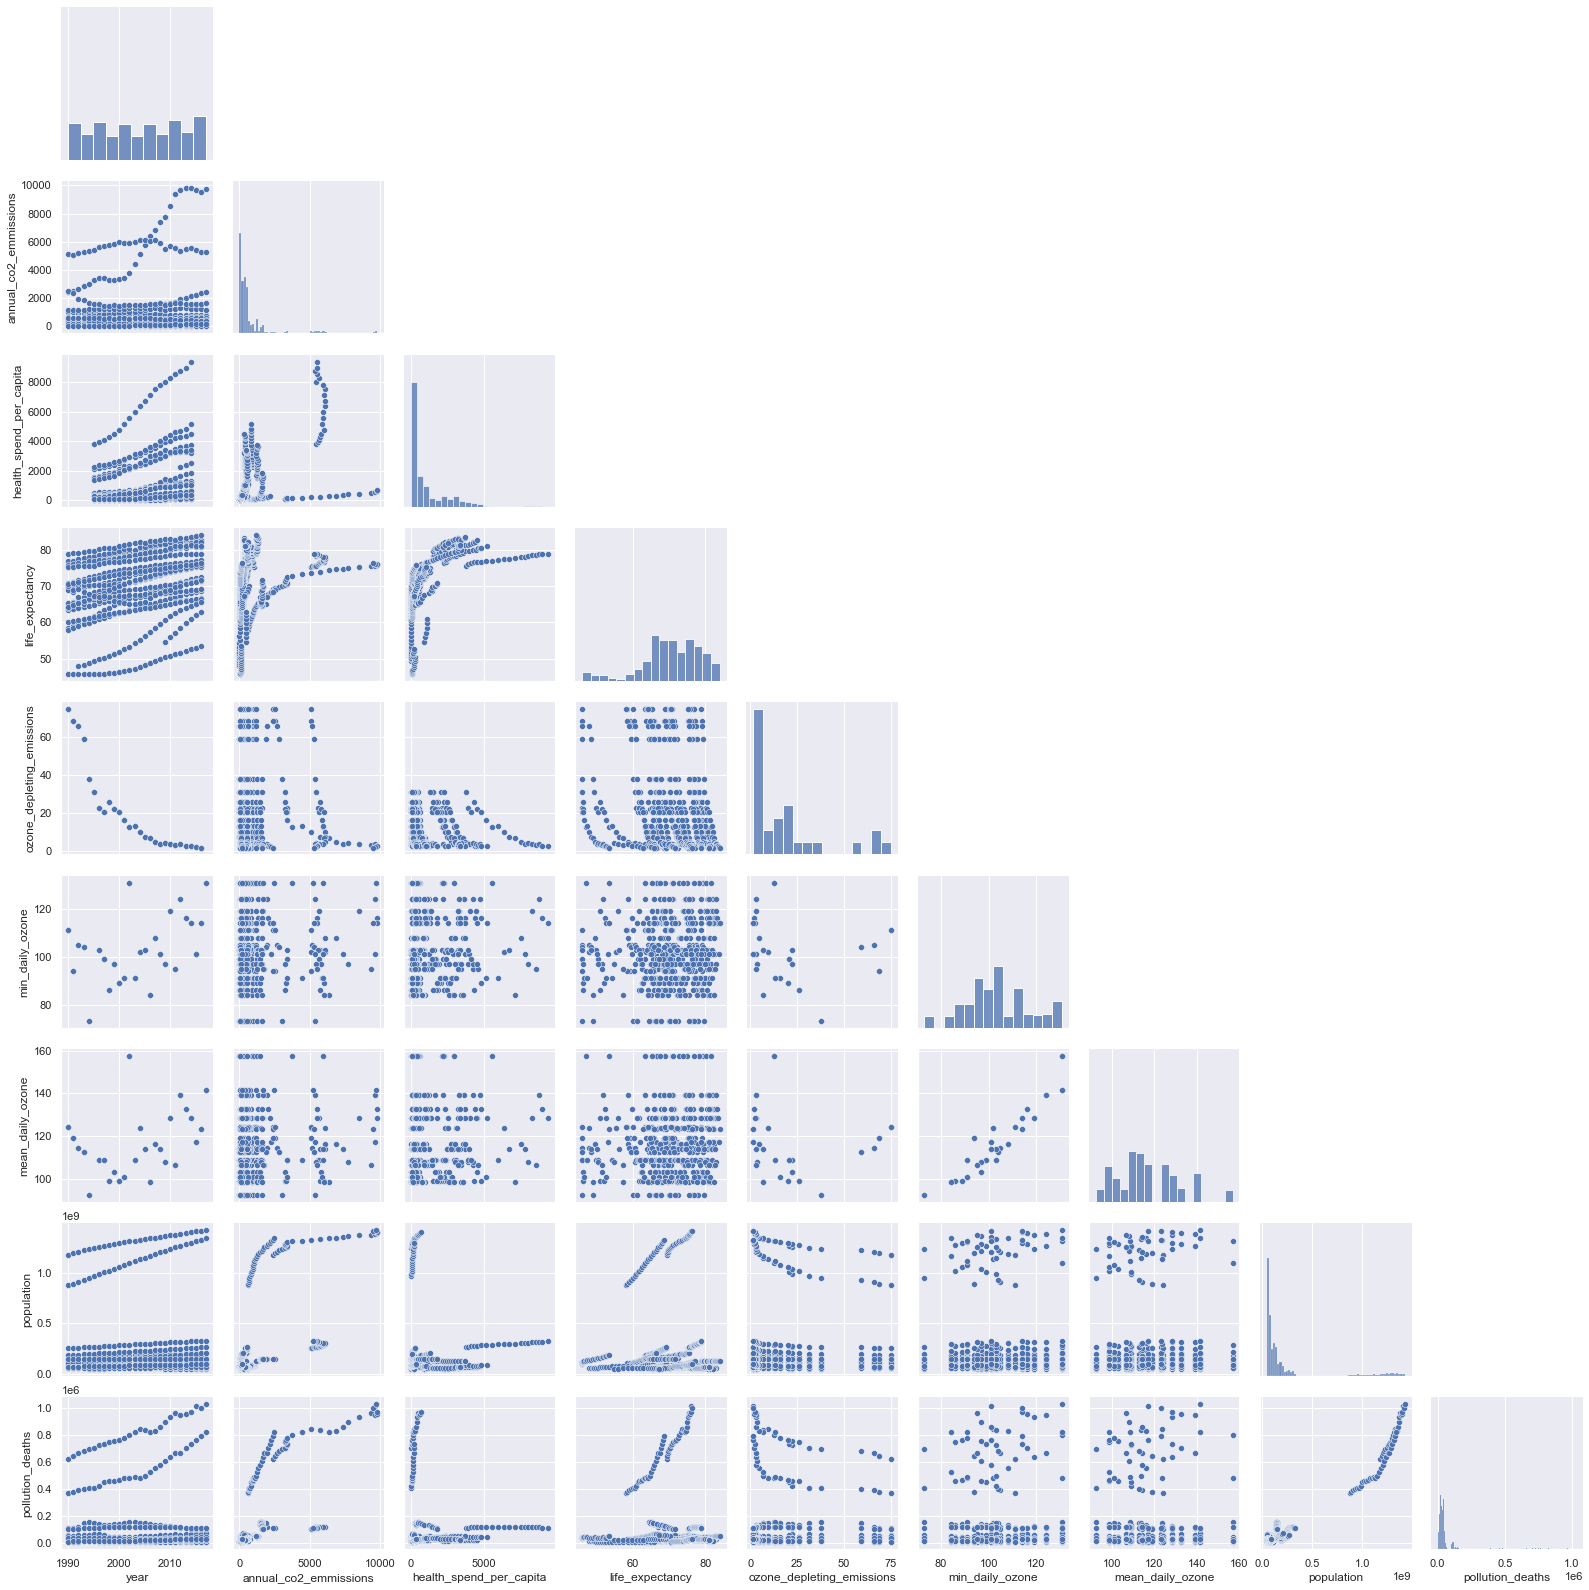

In [85]:
sns.pairplot(df_high_pop, corner = True);

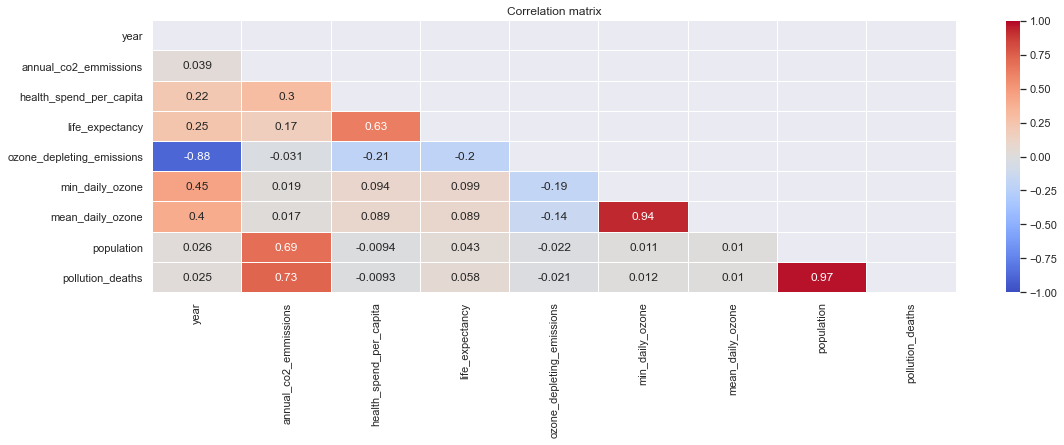

In [41]:
sns.set(style="darkgrid", context="notebook")
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18, 5))
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.01
)
plt.title('Correlation matrix');

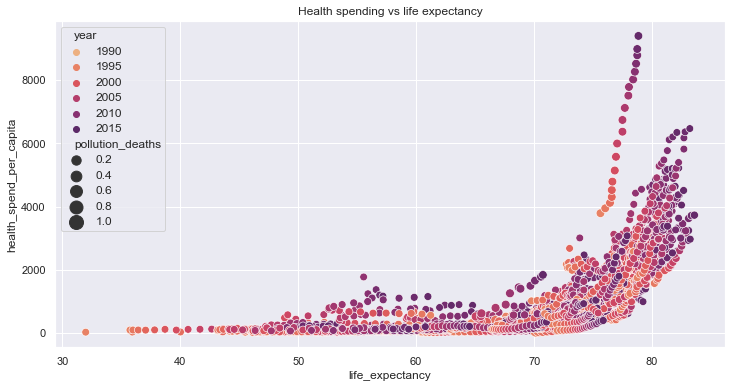

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(y = df['health_spend_per_capita'], x = df['life_expectancy'], 
                hue = df['year'], 
                size = df['pollution_deaths'],
                palette='flare', sizes = (60,200)).set_title("Health spending vs life expectancy");
sns.set(style='darkgrid')
plt.show()

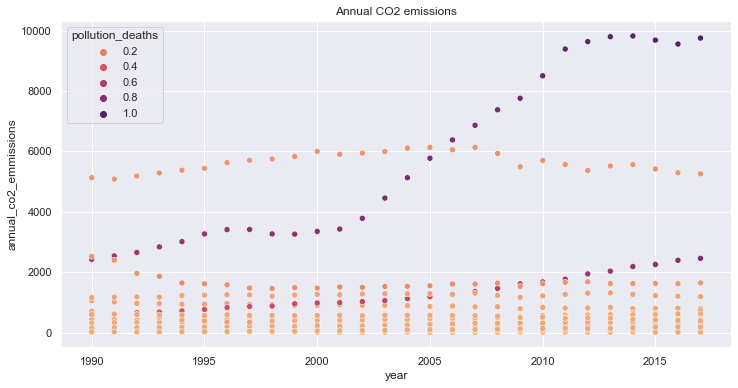

In [68]:
plt.figure(figsize=(12, 6))
sns.scatterplot(y = df_high_pop['annual_co2_emmissions'], x = df['year'], 
                hue = df['pollution_deaths'], 
                #size = df['year'],
                palette='flare', sizes = (60,200)).set_title("Annual CO2 emissions");
sns.set(style='darkgrid')
plt.show()

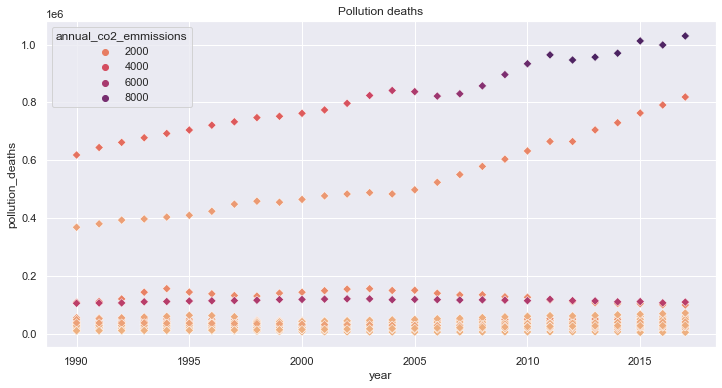

In [75]:
plt.figure(figsize=(12, 6))
sns.scatterplot(y = df_high_pop['pollution_deaths'], x = df['year'], 
                hue = df['annual_co2_emmissions'], 
                #size = df['year'],
                palette='flare', sizes = (60,200), marker = 'D').set_title("Pollution deaths");
sns.set(style='darkgrid')
plt.show()

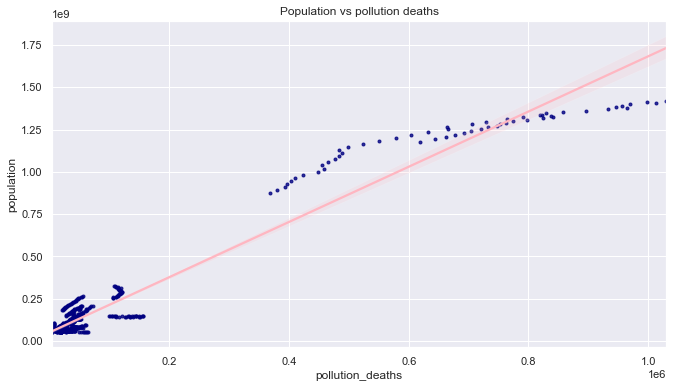

In [80]:
sns.set(style="darkgrid", context="notebook")
plt.figure(figsize=(11, 6))
sns.regplot(df_high_pop['pollution_deaths'], df_high_pop['population'], 
            scatter_kws={"color": "navy"}, 
            line_kws={"color": "lightpink"},
           marker = '.').set_title('Population vs pollution deaths') 
                #hue = df_train['Gr Liv Area'], 
                #size = df_train['Gr Liv Area'],
                #palette='icefire', sizes = (10,200)).set_title("Sale Price in USD vs Home Square Footage");
plt.show()

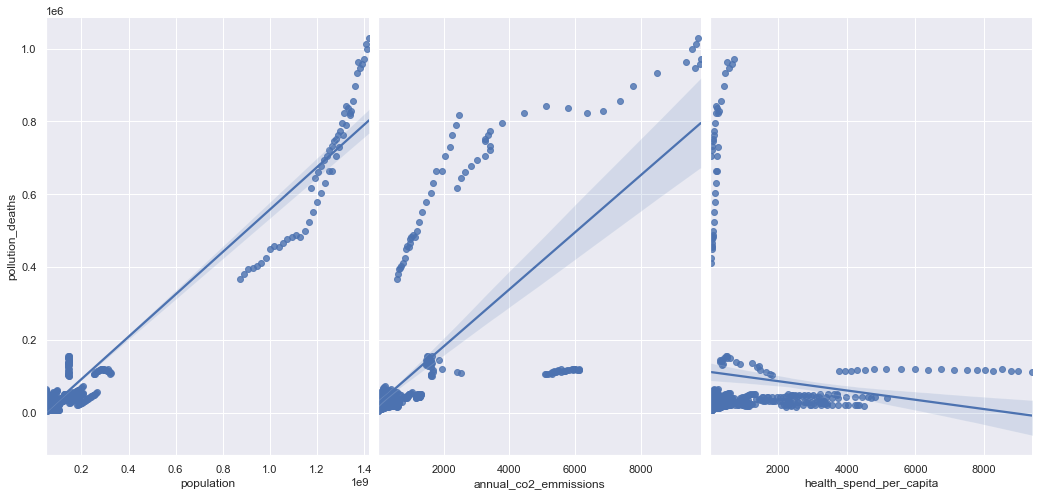

In [82]:
sns.pairplot(df_high_pop, x_vars=['population','annual_co2_emmissions',
                                  'health_spend_per_capita'], y_vars='pollution_deaths', size=7, aspect=0.7, kind='reg')

#### Tableau Visaulizations
 - Note: Visualizations also available in images folder, but will not be interactive.

In [76]:
%%html
<div class='tableauPlaceholder' id='viz1612733902671' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;po&#47;pollution_1_16127328885770&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='pollution_1_16127328885770&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;po&#47;pollution_1_16127328885770&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1612733902671');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1427px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [78]:
%%html
<div class='tableauPlaceholder' id='viz1612736589737' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PM&#47;PM2_5PM10_16127364882490&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='PM2_5PM10_16127364882490&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PM&#47;PM2_5PM10_16127364882490&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1612736589737');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [77]:
%%html
<div class='tableauPlaceholder' id='viz1612735302973' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PM&#47;PM2_5Worldwide&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='PM2_5Worldwide&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PM&#47;PM2_5Worldwide&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1612735302973');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### Tableau back-up (extra visualizations)
 - Duplicates if embedded images do not push to GitHub

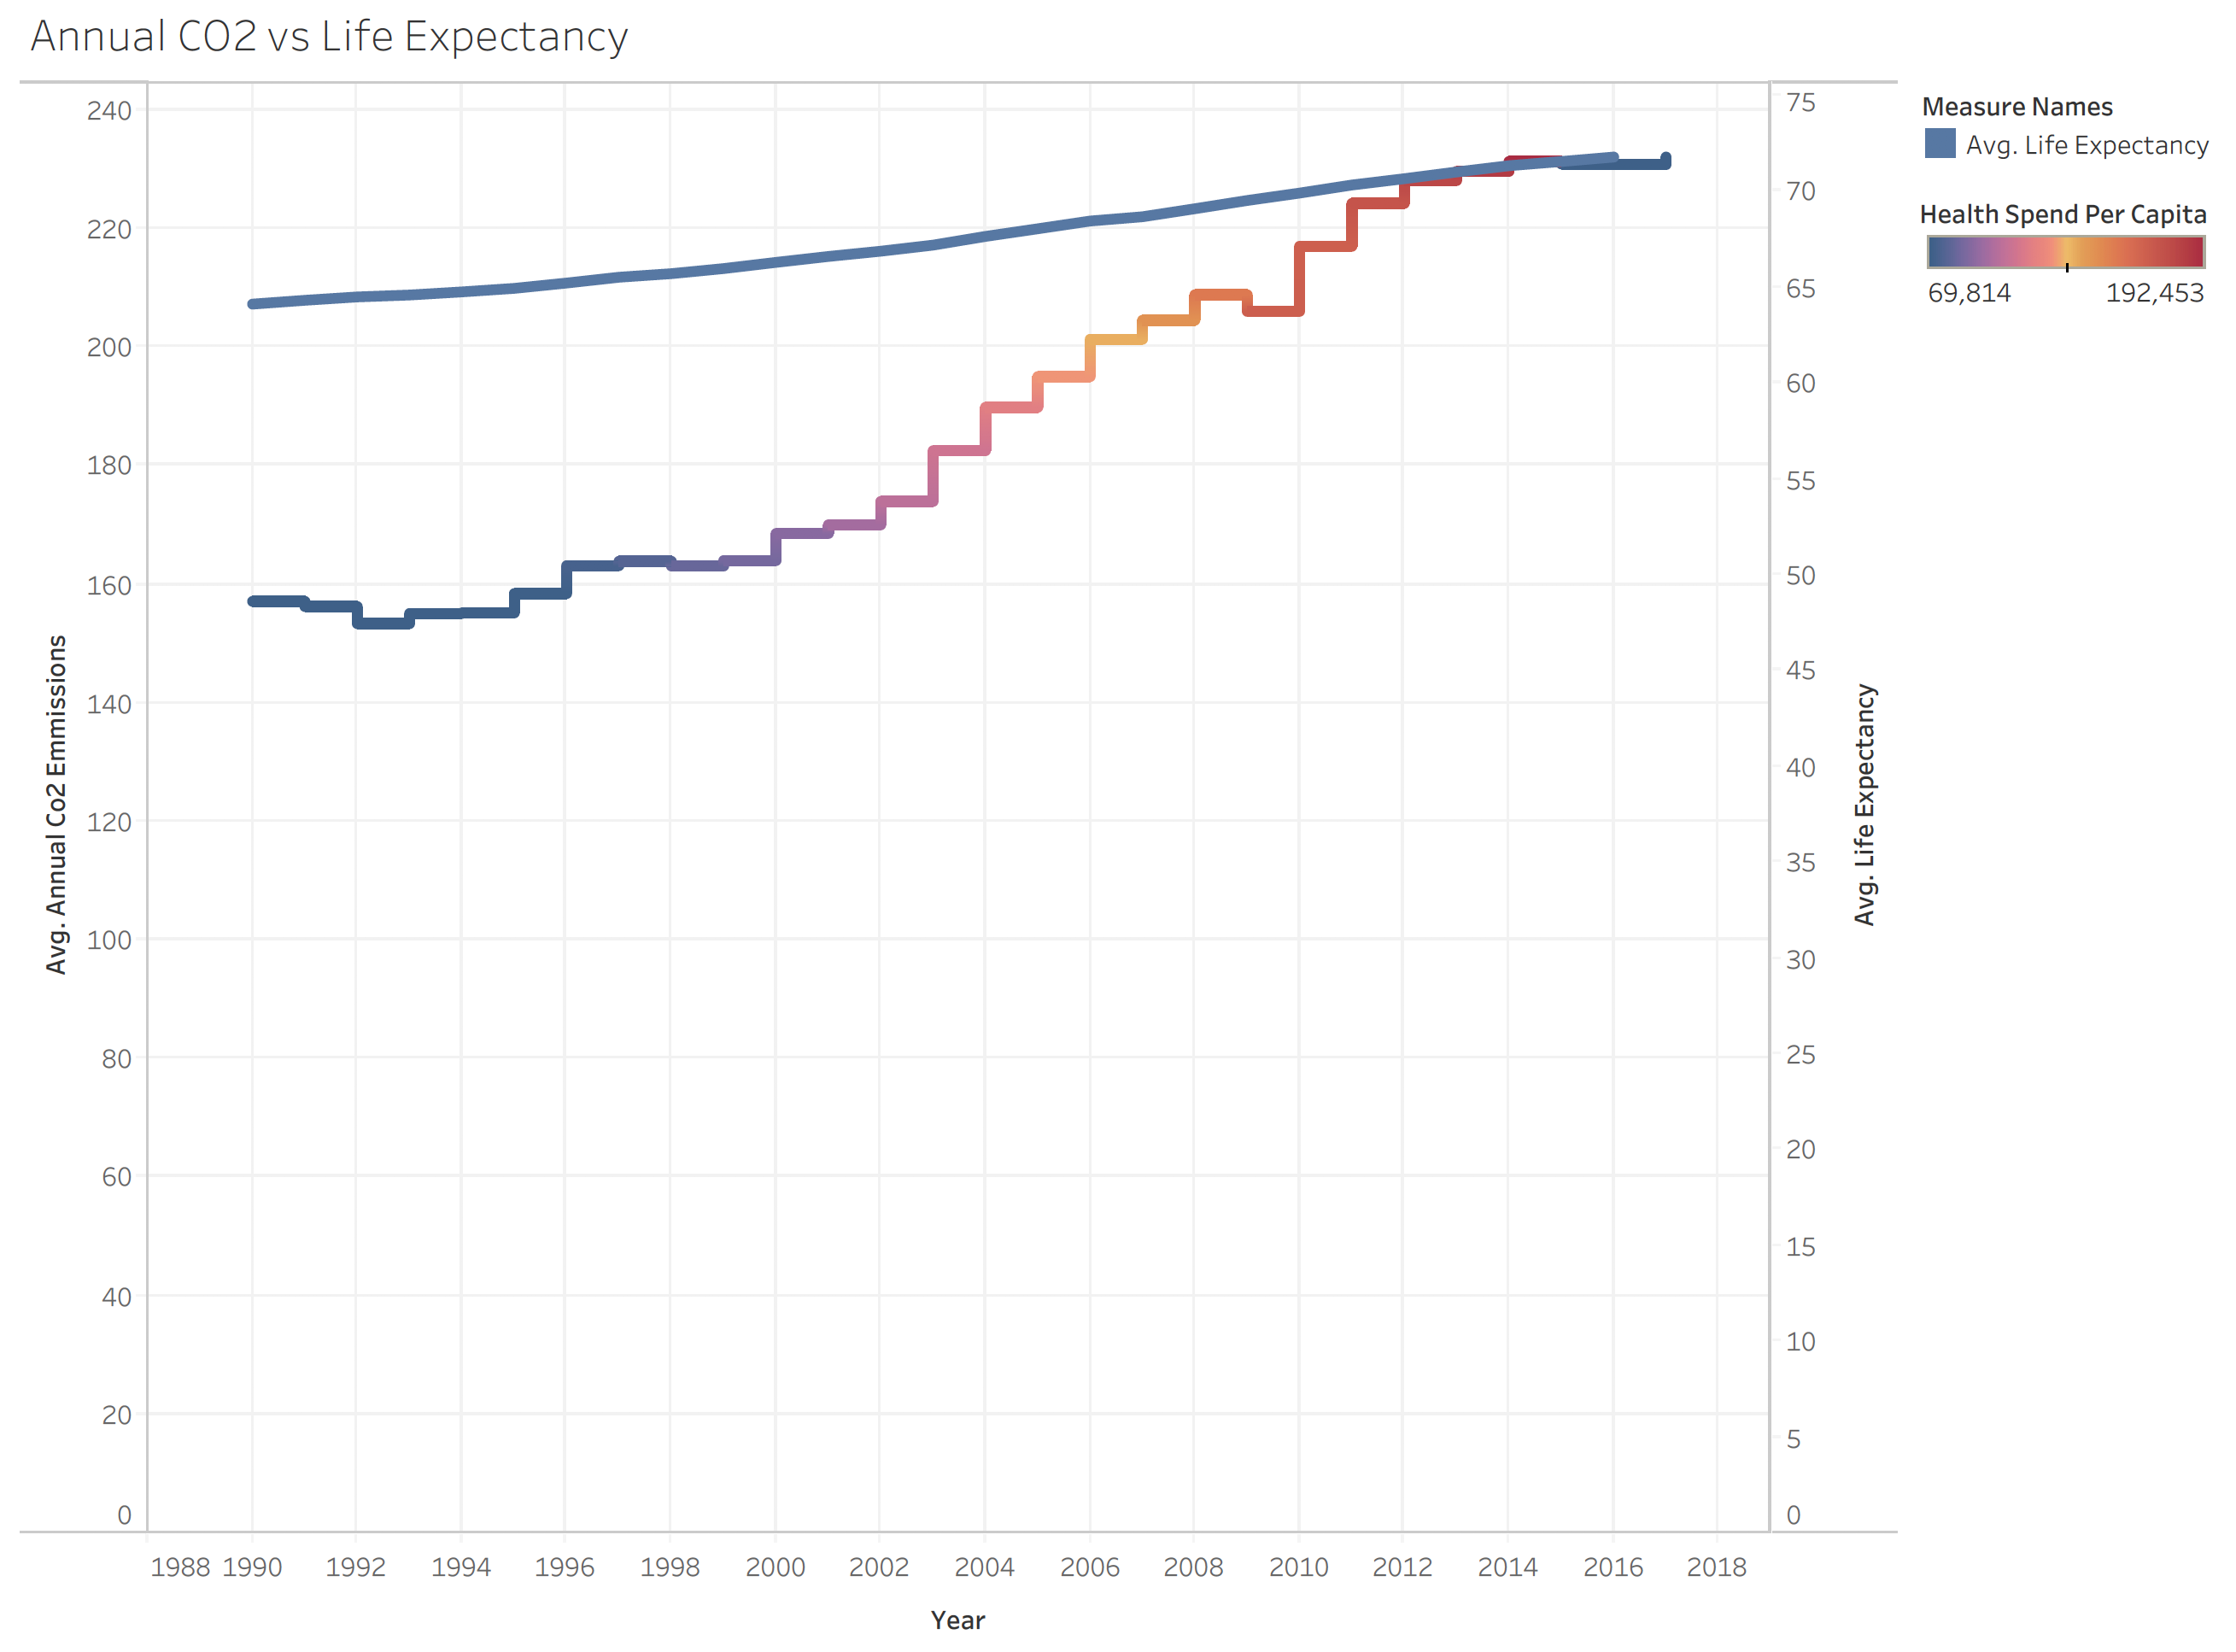

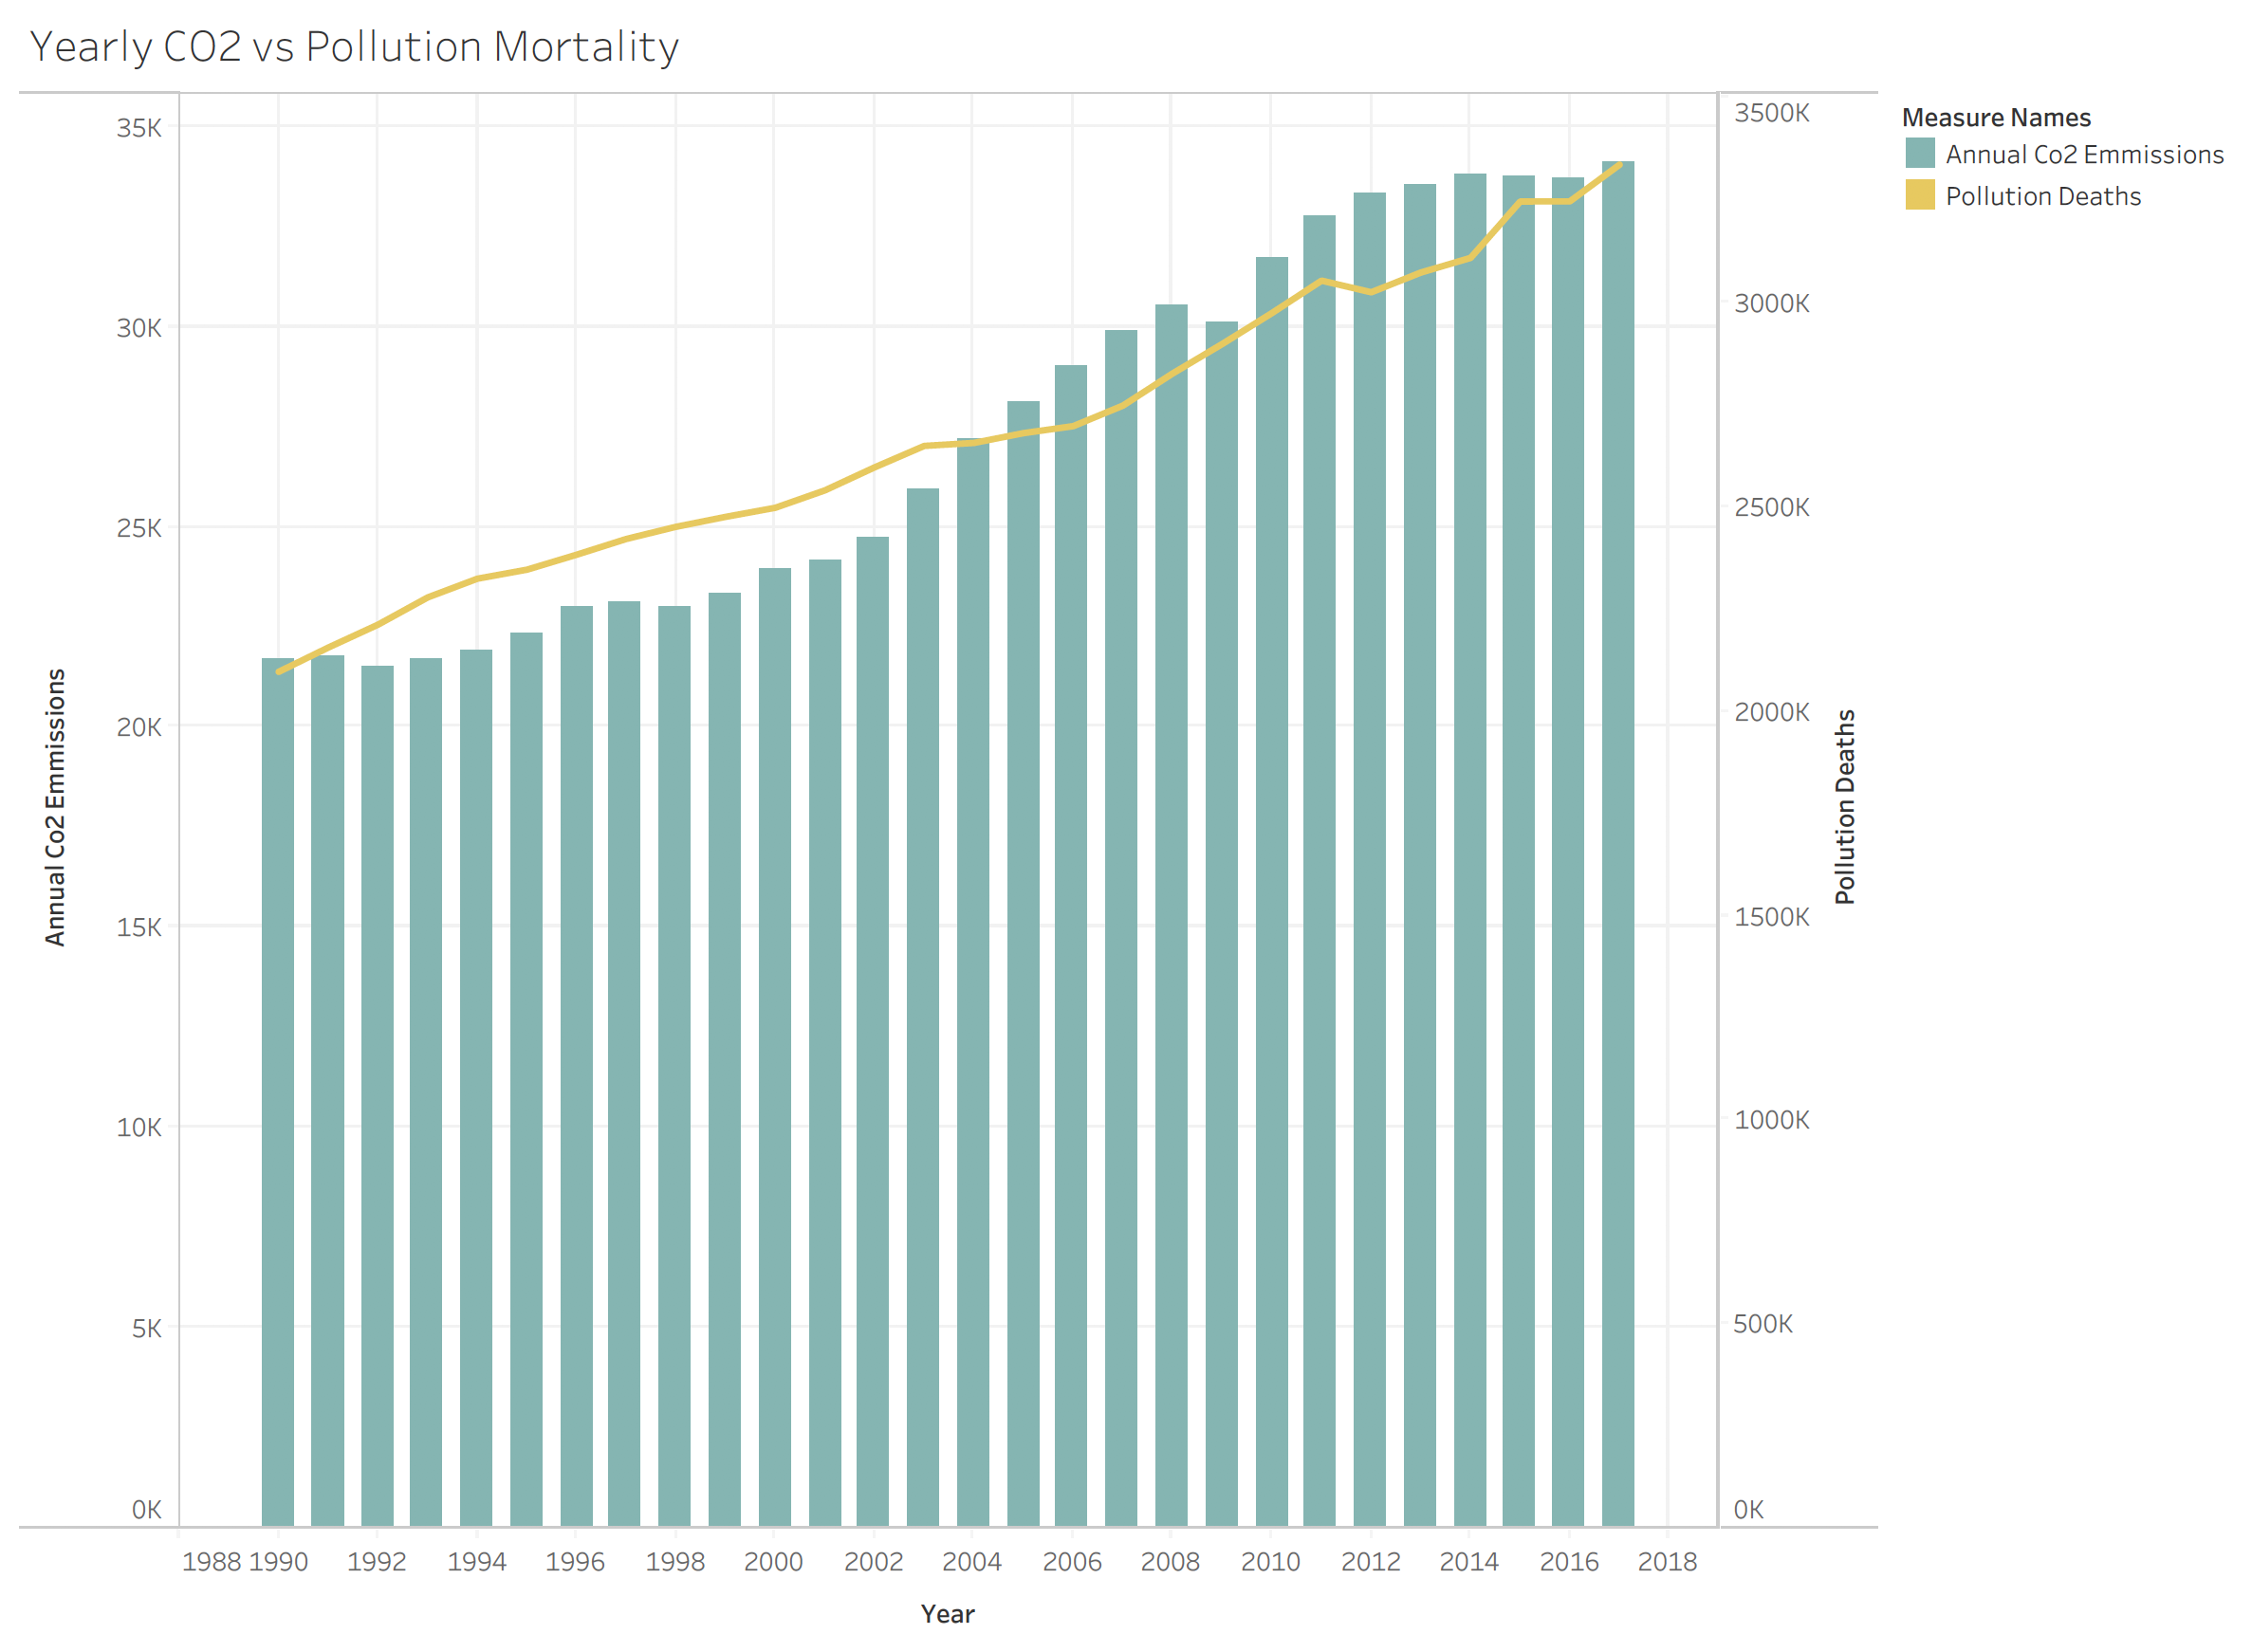

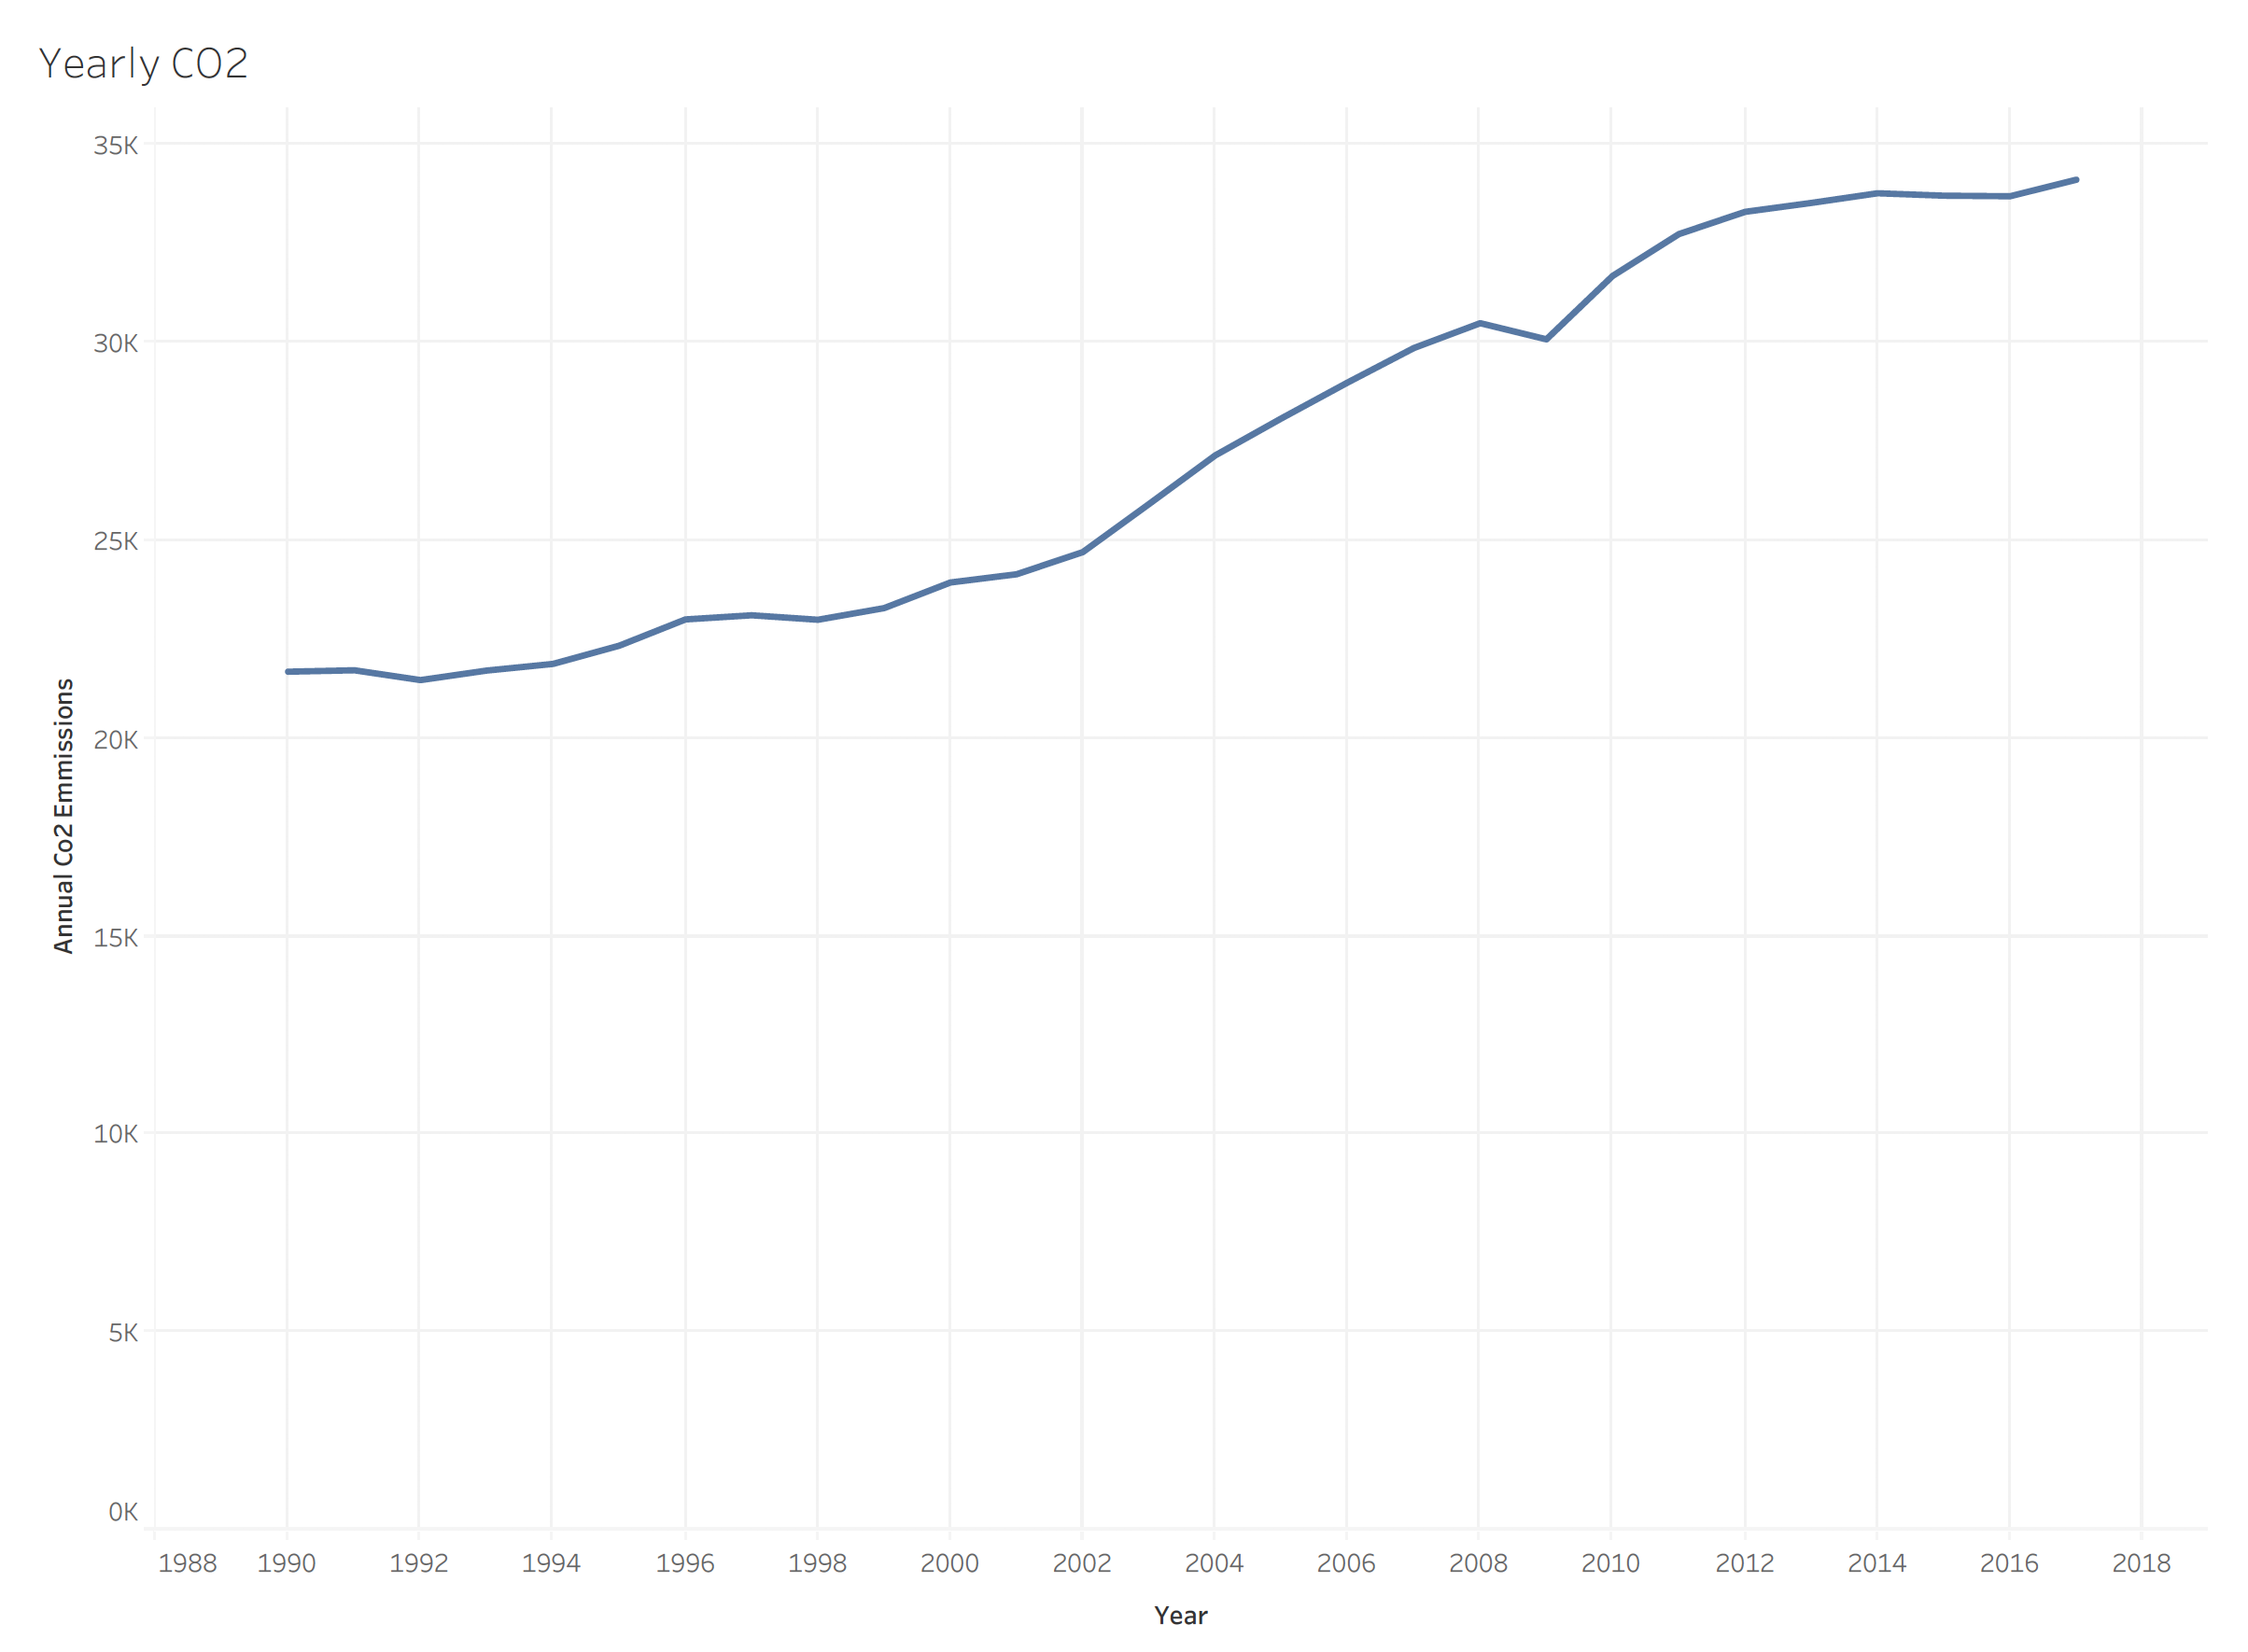

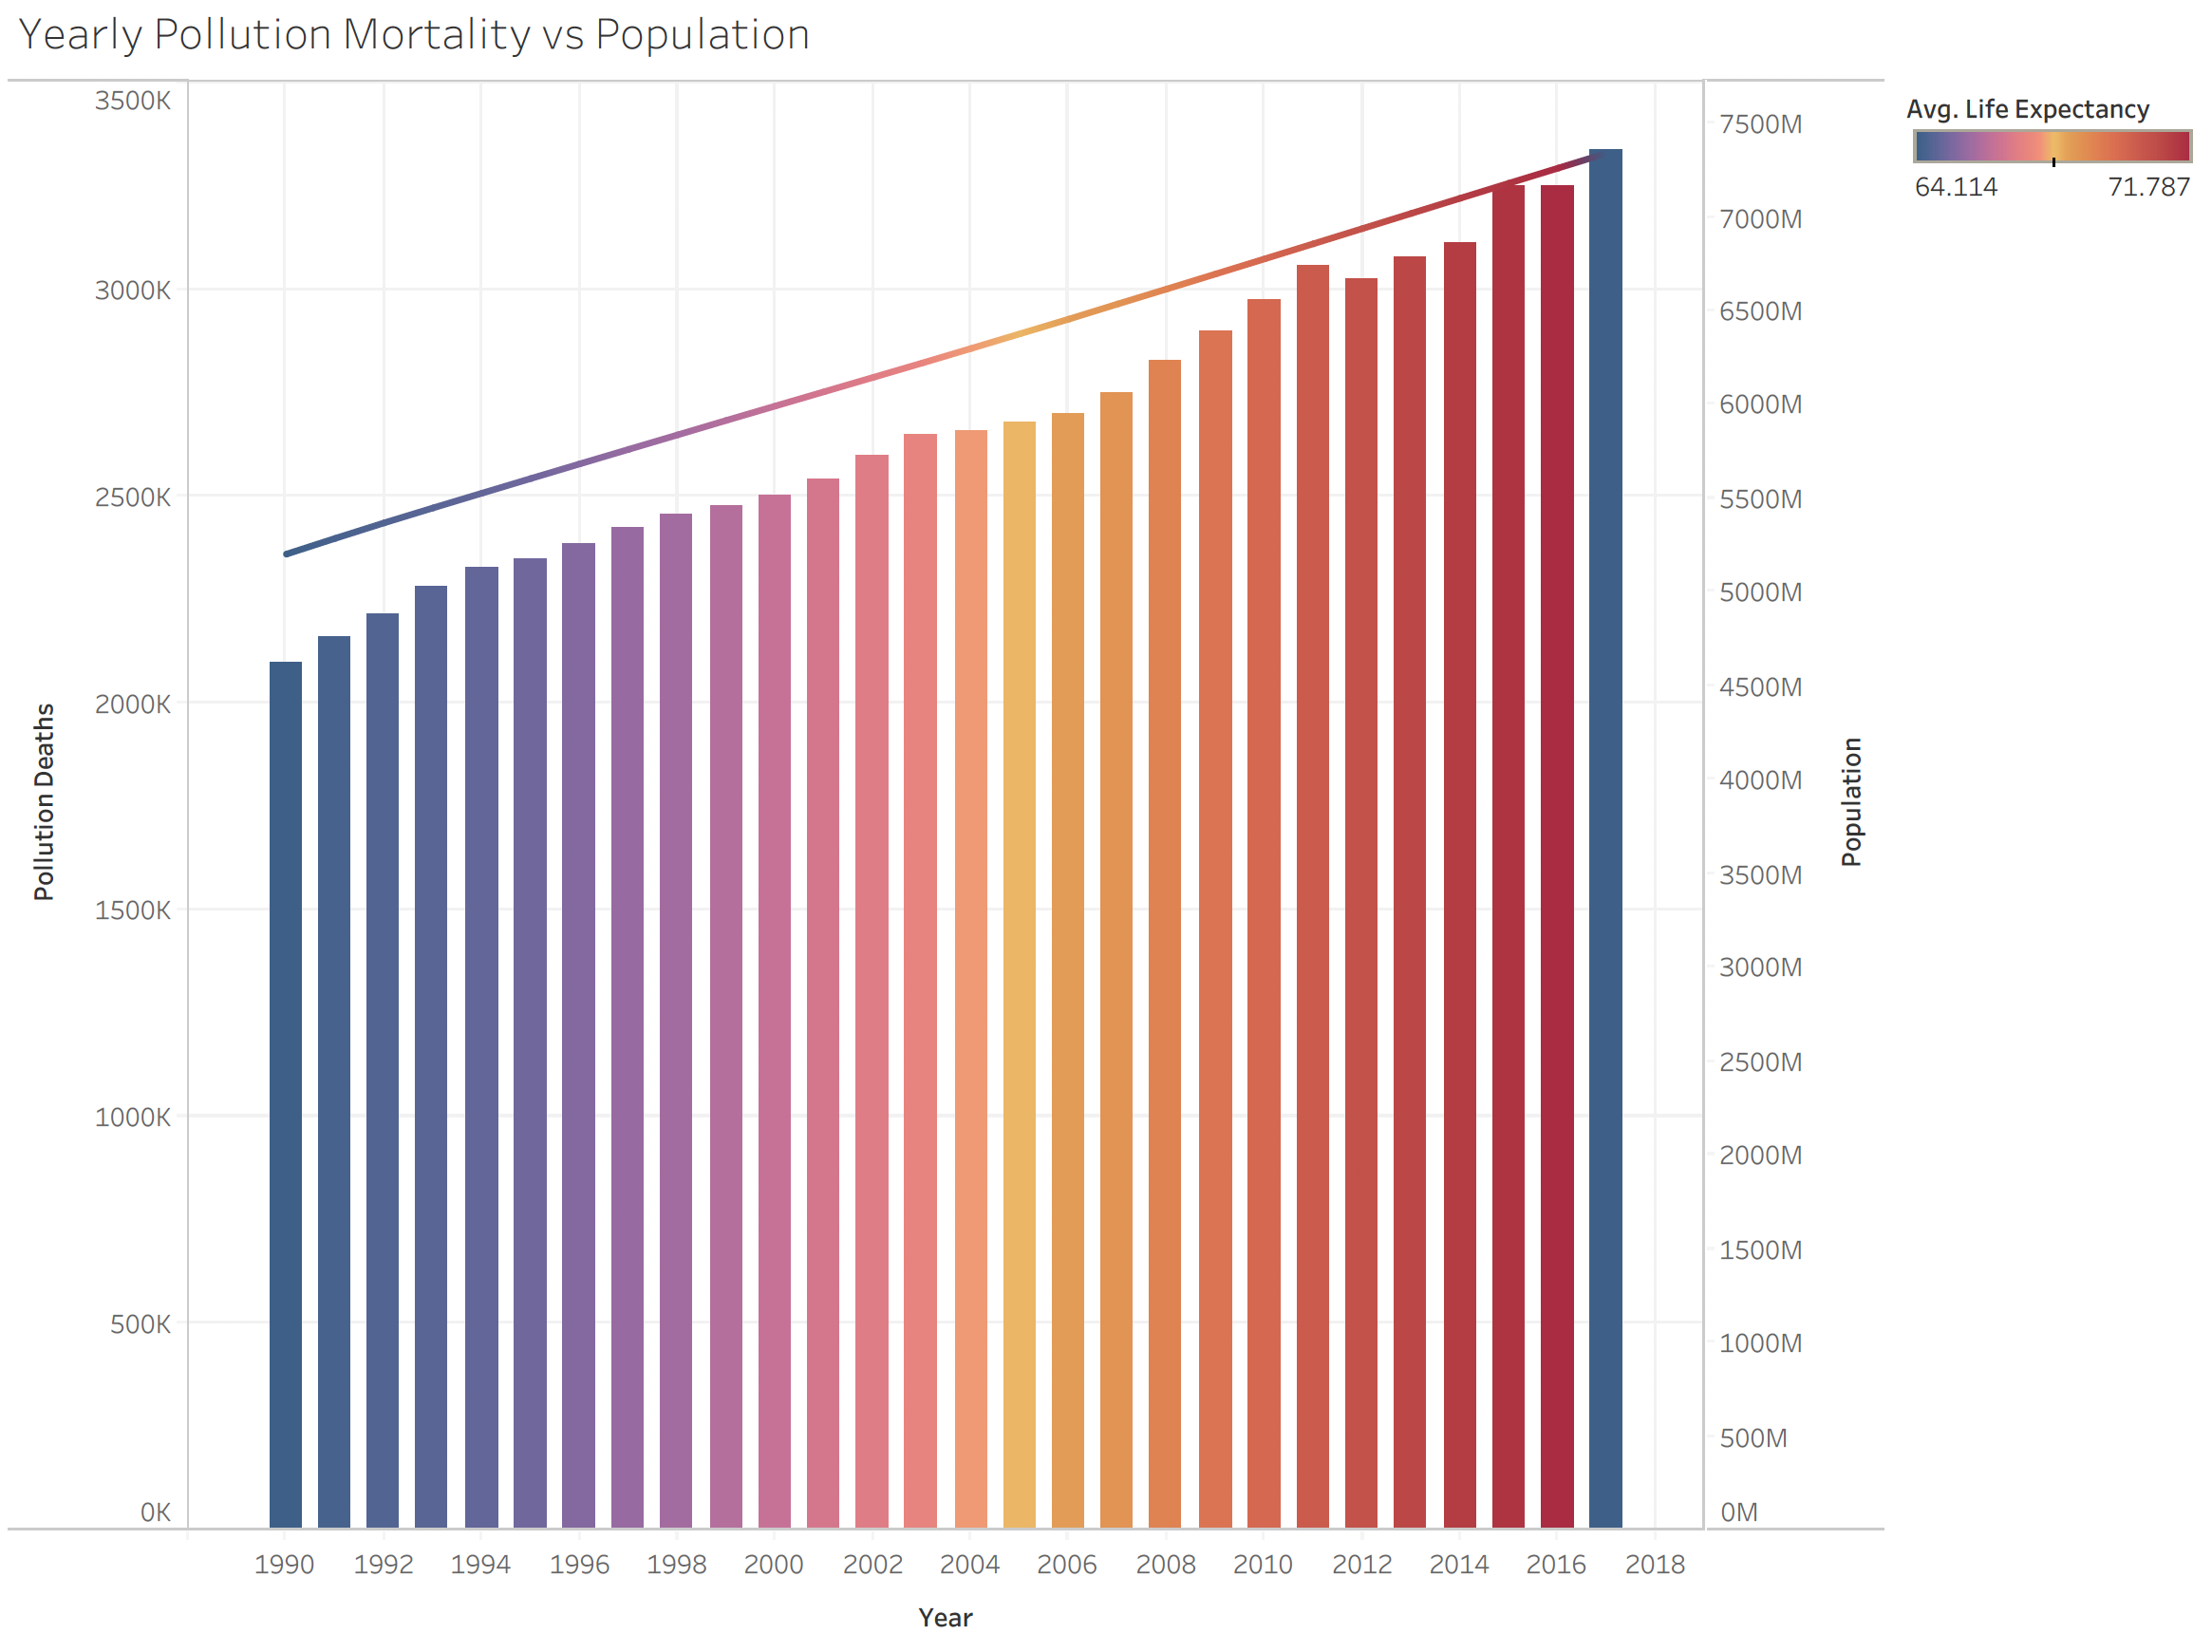

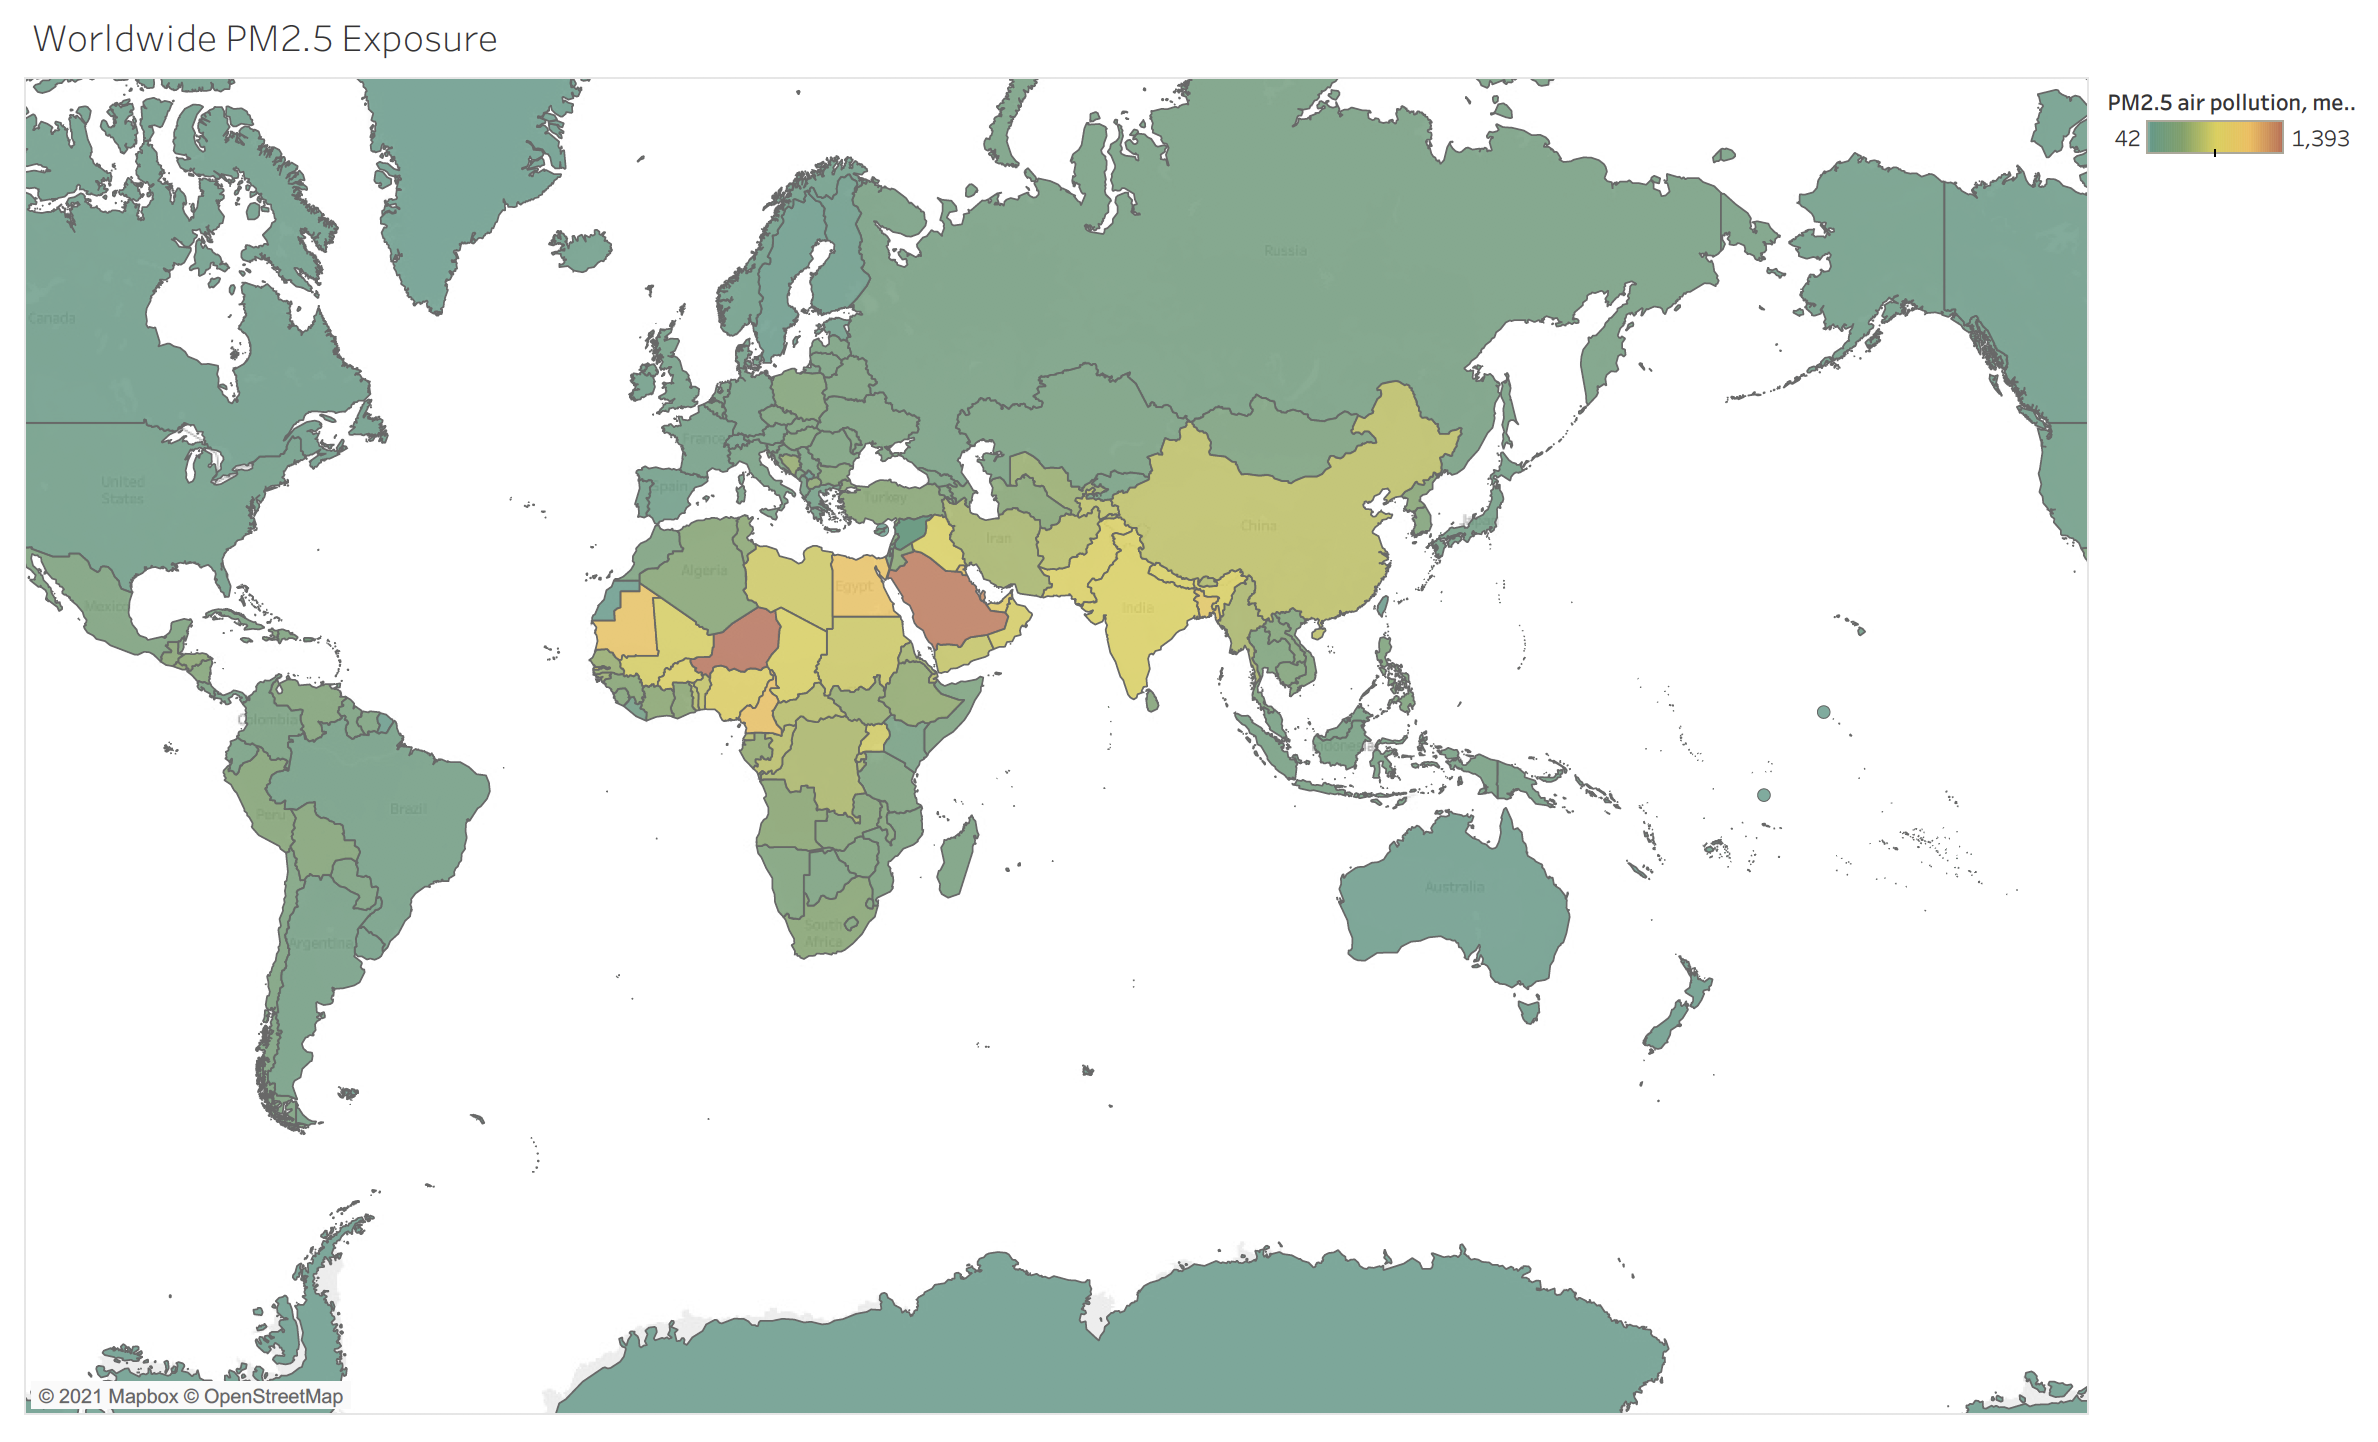

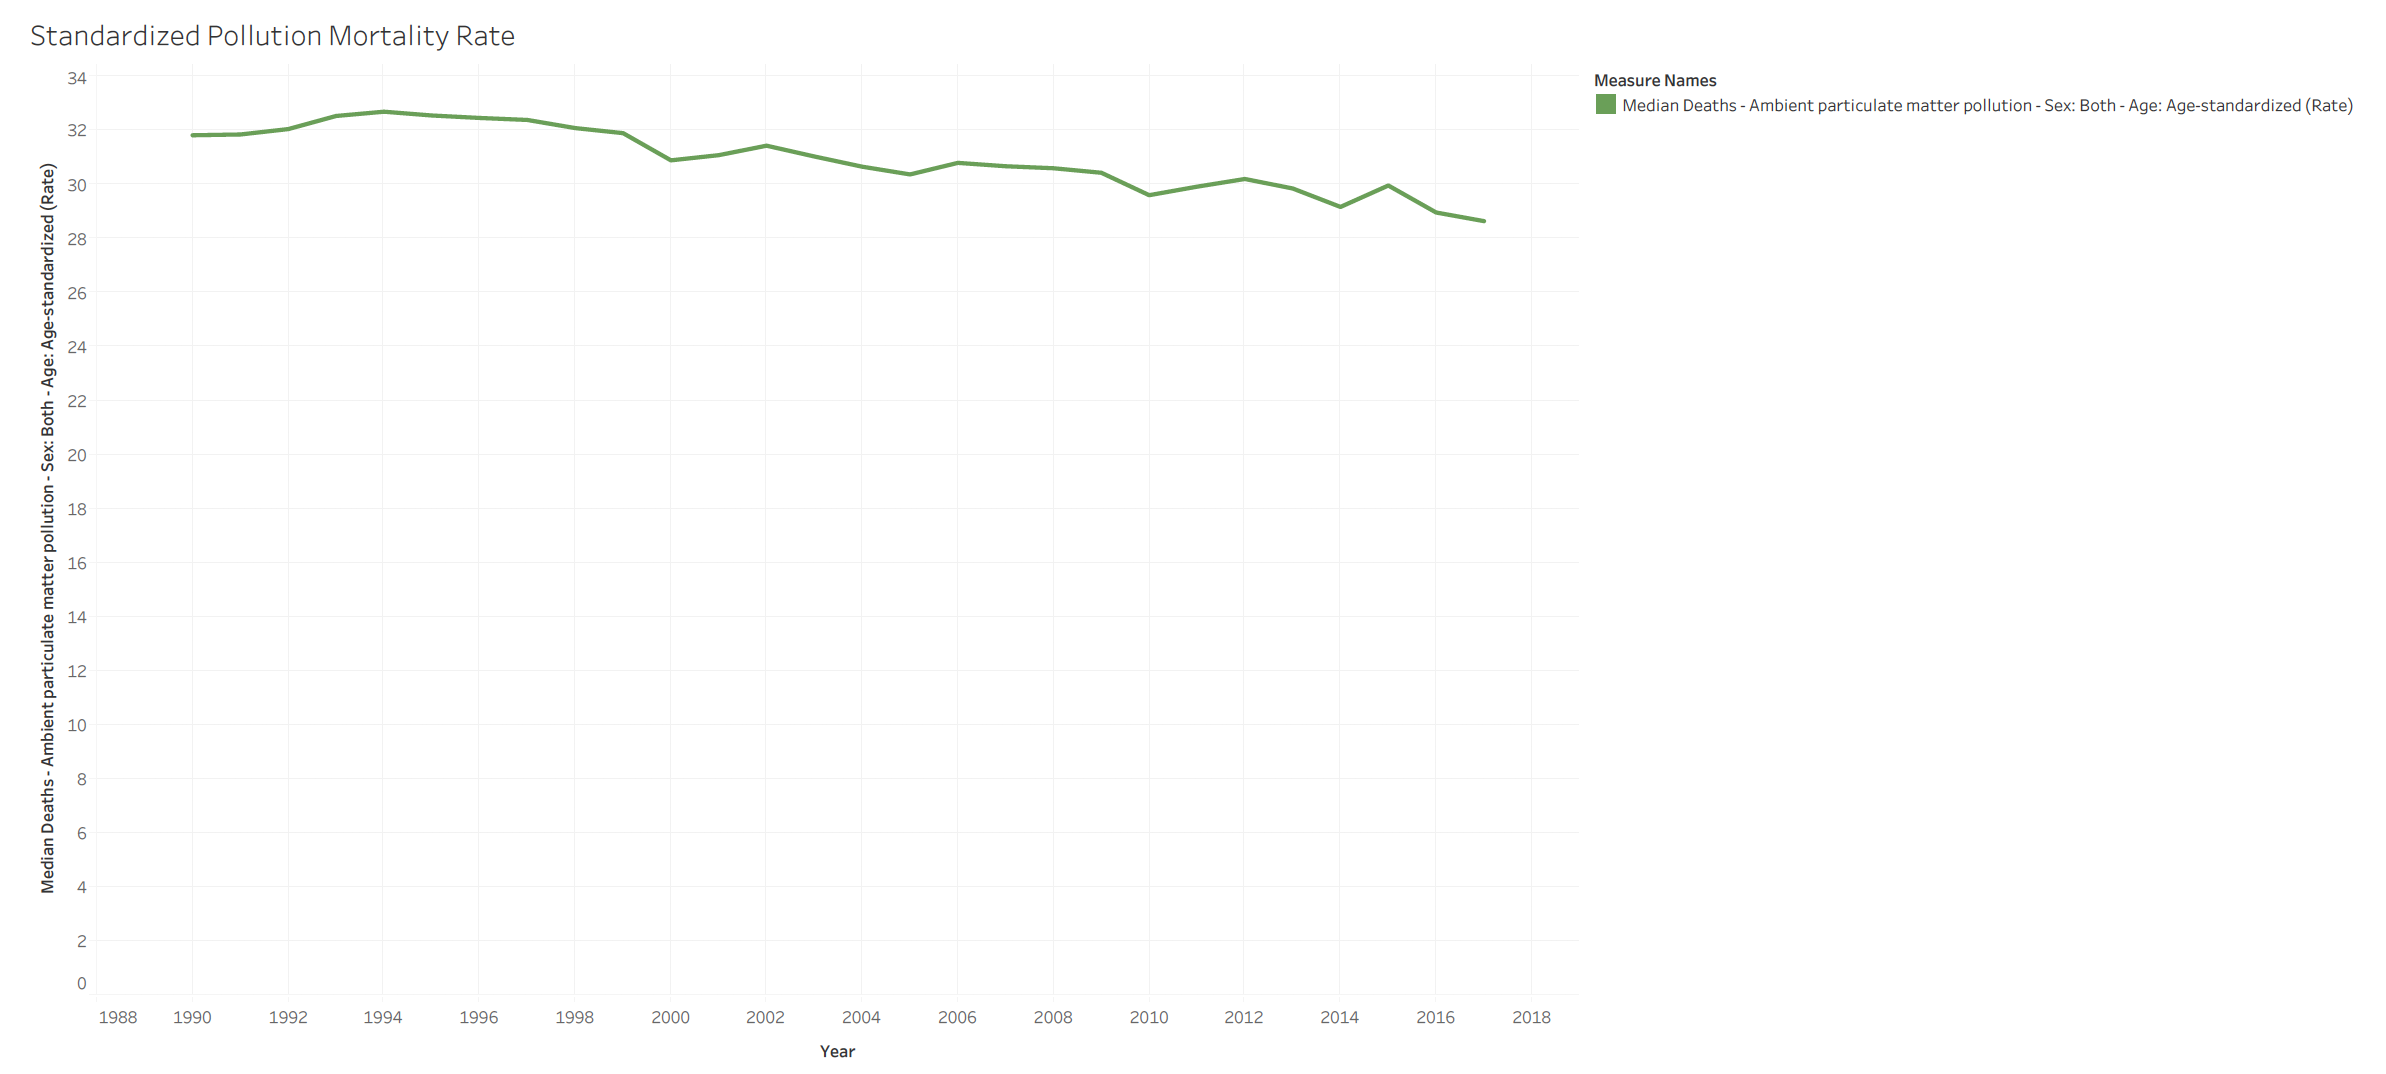

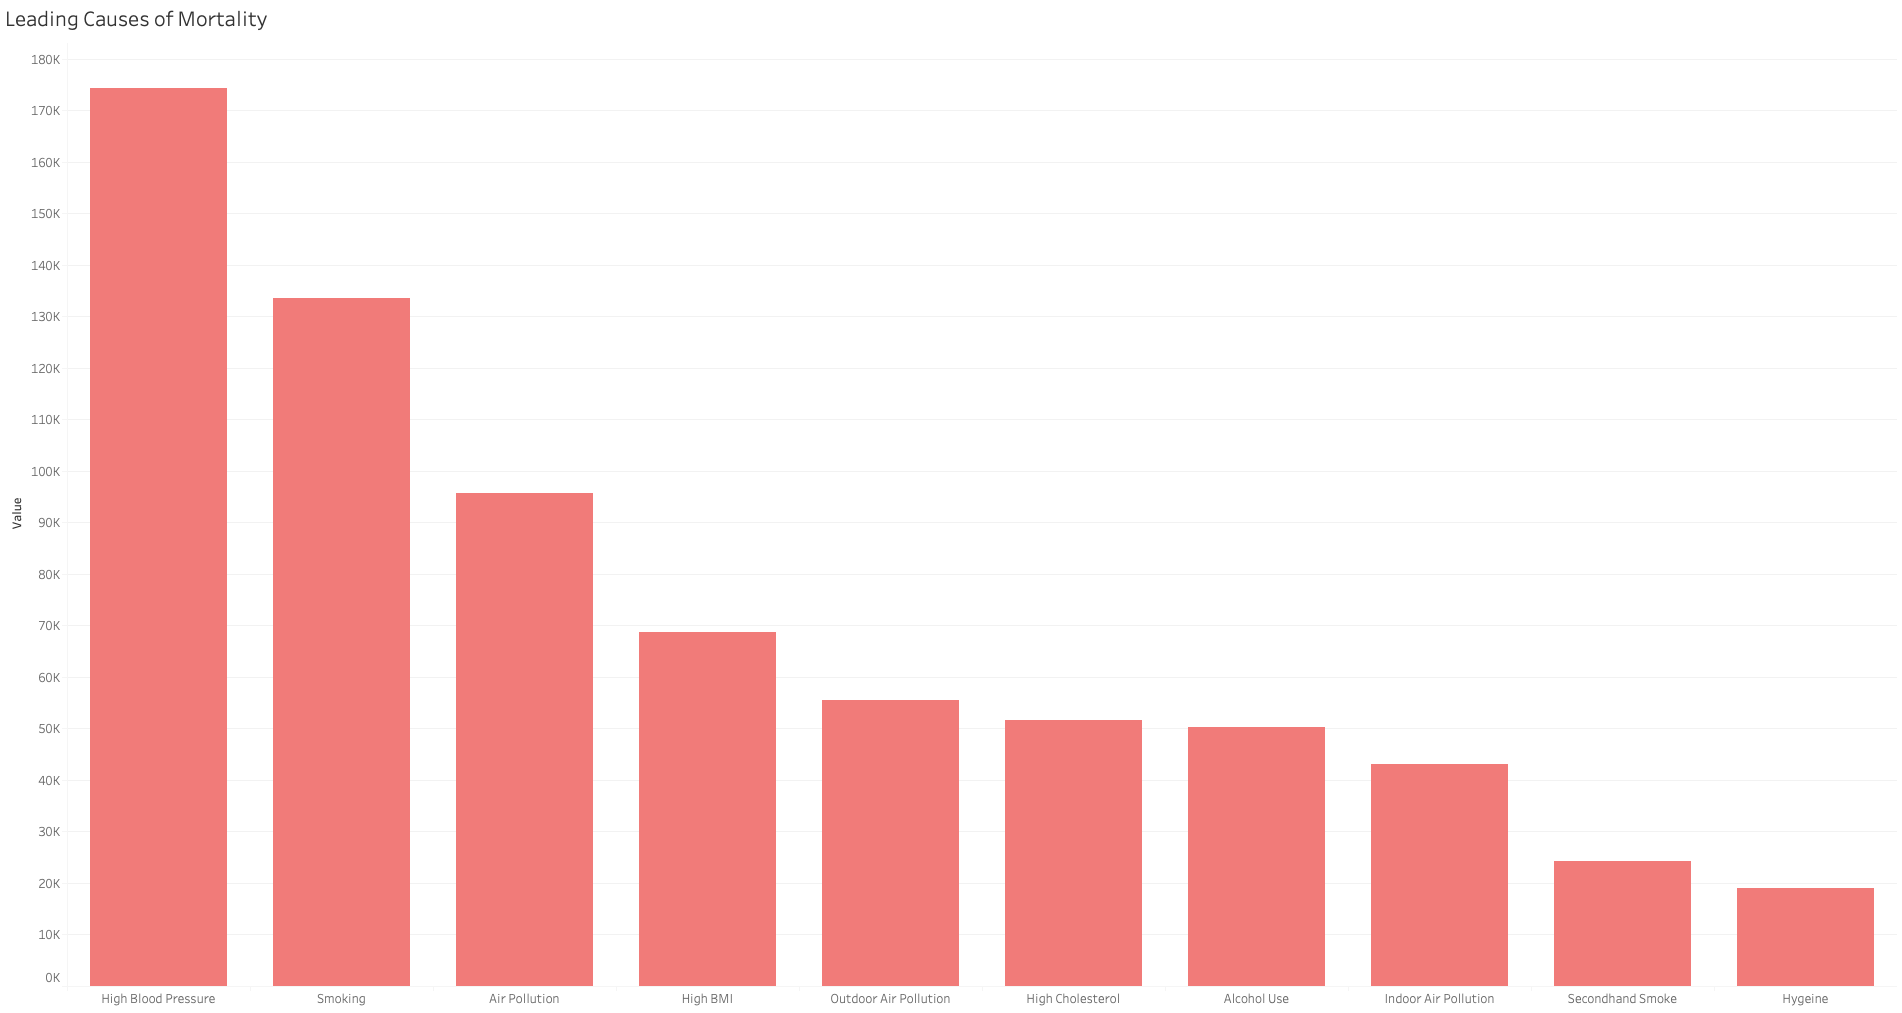